The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.00043255306272011737
214
Delta:  197.89479575454382 Theta:  0.01
Run:  0


C:\Users\jarvi\amp_qgt.ipynb:212: RuntimeWarning: divide by zero encountered in double_scalars
  "            norm_correl = np.nan_to_num((np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2, nan = 0.0)\n",
C:\Users\jarvi\amp_qgt.ipynb:212: RuntimeWarning: invalid value encountered in double_scalars
  "            norm_correl = np.nan_to_num((np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2, nan = 0.0)\n",


0.0006346560900762414
50
Delta:  31.51313020189784 Theta:  0.059000000000000004
Run:  0
0.0009311883035526797
38
Delta:  16.32322908482505 Theta:  0.108
Run:  0
0.0013662701268164809
36
Delta:  10.539643455100023 Theta:  0.15700000000000003
Run:  0
0.002004636497590541
38
Delta:  7.582422059196037 Theta:  0.20600000000000002
Run:  0
0.0029412686470981103
42
Delta:  5.711820991453832 Theta:  0.255
Run:  0
0.0043155261638708215
49
Delta:  4.54174050990337 Theta:  0.30400000000000005
Run:  0
0.006331882022891047
58
Delta:  3.6639975154507396 Theta:  0.35300000000000004
Run:  0
0.00929034570279365
69
Delta:  2.9708259394158554 Theta:  0.402
Run:  0
0.013631100984728752
82
Delta:  2.406261976691877 Theta:  0.451
Run:  0
0.02
100
Delta:  2.0 Theta:  0.5
Run:  0
0.029344658252339992
120
Delta:  1.635732118167449 Theta:  0.549
Run:  0
0.043055448397331275
144
Delta:  1.3378097812022844 Theta:  0.5980000000000001
Run:  0
0.06317237095604723
172
Delta:  1.0890837079372602 Theta:  0.647
Run:  0
0

Text(0.5, 0, '$\\alpha$')

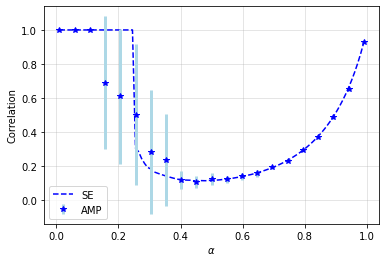

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Made for the Sublinear QGT problem by: Järvi Raes
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from ipynb.fs.full.amp_qgt import sub_amp_bayes, amp_bayes, create_beta, Xiid_to_Xtilde, y_iid_to_y_iid_tilde
from ipynb.fs.full.se_qgt import state_ev_iid_disc, state_ev_iid_disc_sub
from numpy.random import binomial

#number of subjects
p = 2500
noise = 0

run_no = 100


theta_array = np.linspace(0.01, 0.99, num=21)

se_theta_array = np.linspace(0.01, 0.99, num=101)

nc_array_av = []
nc_array_std = []
se_nc_array = []


for theta in theta_array:
    nu = p**(theta-1)
    print(nu)
    ITL1 = int(2*(1-theta)/theta*p**theta)
    print(ITL1)
    ITL2= int((1+np.sqrt(theta))/(1 - np.sqrt(theta))*2*(1-theta)/theta*p**theta)
    delta = ITL1/(nu*p)
    #defective chance
    
    print("Delta: ", delta, "Theta: ", theta)
    #number of tests
    n = int(delta*nu*p)
    
    mse_runs = []
    nc_runs = []
    
    #IID
    for run in range(run_no):
        beta_0 = create_beta(nu, p)
        #print(beta_0)
        t = 100
        #chance of inclusion in a test
        alpha = 0.5
        if(run % 25 ==0):
            print("Run: ", run)
            
        X = binomial(1, alpha, (n,p))
        y = np.dot(X, beta_0)
        
        #AMP
        X_tilde = Xiid_to_Xtilde(X, alpha)
        
        defect_no = np.sum(beta_0)
        
        y_tilde = y_iid_to_y_iid_tilde(y, alpha, nu, n, p, defect_no)
        X_tilde_T = np.transpose(X_tilde)
        beta, mse_pred, tau_array, error_norm_array, nc_array = sub_amp_bayes(X_tilde, X_tilde_T, y_tilde, t, nu, beta_0, theta, delta)
        if np.linalg.norm(beta_0)==0:
            norm_correl = 1 
        else: 
            norm_correl = np.nan_to_num((np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2, nan = 0.0)
        
        nc_runs.append(norm_correl)
    nc_array_av.append(np.average(nc_runs))
    nc_array_std.append(np.std(nc_runs))
    
for theta in se_theta_array: 
    nu = p**(theta-1)
    ITL1 = int(2*(1-theta)/theta*p**theta)
    ITL2= int((1+np.sqrt(theta))/(1 - np.sqrt(theta))*2*(1-theta)/theta*p**theta)
    delta = ITL1/(nu*p)
    #IID STATE EVOLUTION
    tau, mse_pred, nc_pred, _ = state_ev_iid_disc_sub(ITL1/(nu*p), t, nu, p,  theta)
    se_nc_array.append(nc_pred)
    
    
plt.figure()
plt.plot(se_theta_array, se_nc_array, label=r'SE', color = 'blue', linestyle = 'dashed')
plt.errorbar(theta_array, nc_array_av, yerr=nc_array_std, label =r"AMP", fmt='*', color='blue',ecolor='lightblue', elinewidth=3, capsize=0)
plt.grid(alpha=0.4)
plt.legend()
plt.ylabel('Correlation')
plt.xlabel(r'$\alpha$')
#tikzplotlib.save("pool_fig6a.tex")

